<a href="https://colab.research.google.com/github/Emrose-1341/EEG-Data/blob/Task-Analysis/Working_Memory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from scipy.stats import norm as norm
!pip install openpyxl
from google.colab import files

In [ ]:
Working_mem = '/content/WorkingMemReal.xlsx'
wmdf = pd.read_excel(Working_mem)

In [ ]:
wmdf.head()

,Subject,FirstImage,SecondImage,StimNumber,TestArray.ACC,TestArray.CRESP,TestArray.RT,TrialDirection
0,9874,FourStimConfig8c.jpg,FourStimConfig8c.jpg,FourStim,0,5,0,Left
1,9874,FourStimConfig4c.jpg,FourStimConfig4a.jpg,FourStim,0,1,0,Left
2,9874,FourStimConfig7a.jpg,FourStimConfig7a.jpg,FourStim,1,5,463,Right
3,9874,FourStimConfig5b.jpg,FourStimConfig5b.jpg,FourStim,0,5,680,Left
4,9874,FourStimConfig2a.jpg,FourStimConfig2b.jpg,FourStim,1,1,629,Left


In [ ]:
chosen_cols = ['Subject', 'StimNumber', 'TestArray.ACC', 'TestArray.CRESP', 'TestArray.RT', 'TrialDirection']
wmdf = wmdf[chosen_cols]

In [ ]:
each_subject=[wmdf['Subject'].unique() for Subject in wmdf.columns]
each_subject=(each_subject[0]).tolist()
#index 1 was nan and the index after that was "subject" which we do not need
each_subject.remove(each_subject[1])
each_subject.remove(each_subject[1])
#test subject 716 didnt answer any question where the rectangles were the same
#test subject 1482 didnt answer any question at all
print(each_subject)

['9874', '9875', '9920', '9984', '64', '576', '716', '1482', '1923', '2029', '2089', '2390', '2399', '2508', '2937', '3328', '3441', '3454', '3498', '3562', '3667', '3929', '4446', '4522', '4606', '4749', '4861', '4885', '4937', '5236', '5257', '5308', '5664', '6188', '6624', '6647', '6692', '6891', '6961', '6980', '7070', '7556', '8151', '8275', '8610', '8795', '9120', '9435', '9623', '9654', '9672']


In [ ]:
#this cell gets the accuracy for each participant and adds them to an array
def total_acc_array(each_subject):
  acc_array = []
  def test_accuracy(Subject):
    wmdf.loc[wmdf['Subject'] == Subject, 'TestArray.ACC'] = wmdf.loc[wmdf['Subject'] == Subject, 'TestArray.ACC'].astype(int)
    array = wmdf[wmdf['Subject'] == Subject]
    acc = array['TestArray.ACC'].sum() / len(array)
    return acc
  for i in range(len(each_subject)):

    acc_array.append(test_accuracy(each_subject[i]))
  return acc_array
total_subject_acc = total_acc_array(each_subject)
print(total_subject_acc)

[0.625, 0.5138888888888888, 0.5138888888888888, 0.1388888888888889, 0.75, 0.16666666666666666, 0.3611111111111111, 0.0, 0.7777777777777778, 0.5555555555555556, 0.7083333333333334, 0.2222222222222222, 0.5277777777777778, 0.3611111111111111, 0.7361111111111112, 0.3055555555555556, 0.6527777777777778, 0.6805555555555556, 0.5833333333333334, 0.6944444444444444, 0.5, 0.3611111111111111, 0.3055555555555556, 0.7638888888888888, 0.5416666666666666, 0.2777777777777778, 0.4722222222222222, 0.5972222222222222, 0.4305555555555556, 0.6666666666666666, 0.5694444444444444, 0.6805555555555556, 0.5277777777777778, 0.5694444444444444, 0.375, 0.08333333333333333, 0.75, 0.2777777777777778, 0.2916666666666667, 0.625, 0.7916666666666666, 0.19444444444444445, 0.7916666666666666, 0.6388888888888888, 0.3472222222222222, 0.5833333333333334, 0.3472222222222222, 0.6111111111111112, 0.3194444444444444, 0.5555555555555556, 0.4583333333333333]


In [ ]:
#this cell gets the accuracy for each trial where the rectangles are same for each participant and adds them to an array
def same_acc_array(each_subject):
  acc_array = []
  def test_accuracy_same(Subject):
    array = wmdf[wmdf['Subject'] == Subject]
    same_df =array[array['TestArray.CRESP']=='1']
    accarray = same_df[same_df['TestArray.ACC'].astype(int)==1]
    acc = len(accarray)/len(same_df)
    return acc
  for i in range(len(each_subject)):
    acc_array.append(test_accuracy_same(each_subject[i]))
  return acc_array
same_subject_acc = same_acc_array(each_subject)
print(same_subject_acc)

[0.5142857142857142, 0.5833333333333334, 0.5, 0.16666666666666666, 0.6111111111111112, 0.2222222222222222, 0.0, 0.0, 0.8055555555555556, 0.4722222222222222, 0.5555555555555556, 0.1388888888888889, 0.3055555555555556, 0.5277777777777778, 0.6111111111111112, 0.3333333333333333, 0.4722222222222222, 0.5277777777777778, 0.4166666666666667, 0.5833333333333334, 0.5, 0.5277777777777778, 0.08333333333333333, 0.6111111111111112, 0.6666666666666666, 0.2777777777777778, 0.16666666666666666, 0.4444444444444444, 0.3888888888888889, 0.6111111111111112, 0.5, 0.6388888888888888, 0.5833333333333334, 0.4166666666666667, 0.2222222222222222, 0.1388888888888889, 0.6111111111111112, 0.3055555555555556, 0.2222222222222222, 0.3888888888888889, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.5555555555555556, 0.5, 0.6388888888888888, 0.4722222222222222, 0.4166666666666667, 0.4444444444444444, 0.5, 0.6944444444444444]


In [ ]:
#this cell gets the accuracy for each trial where the rectangles are different for each participant and adds them to an array
def diff_acc_array(each_subject):
  acc_array = []
  def test_accuracy_diff(Subject):
    array = wmdf[wmdf['Subject'] == Subject]
    diff_df = array[array['TestArray.CRESP']=='5']
    accarray = diff_df[diff_df['TestArray.ACC'].astype(int)==1]
    acc = len(accarray)/len(diff_df)
    return acc
  for i in range(len(each_subject)):
    acc_array.append(test_accuracy_diff(each_subject[i]))
  return acc_array
diff_subject_acc = diff_acc_array(each_subject)
print(diff_subject_acc)

[0.7647058823529411, 0.4444444444444444, 0.5277777777777778, 0.1111111111111111, 0.8888888888888888, 0.1111111111111111, 0.7222222222222222, 0.0, 0.75, 0.6388888888888888, 0.8611111111111112, 0.3055555555555556, 0.75, 0.19444444444444445, 0.8611111111111112, 0.2777777777777778, 0.8333333333333334, 0.8333333333333334, 0.75, 0.8055555555555556, 0.5, 0.19444444444444445, 0.5277777777777778, 0.9166666666666666, 0.4166666666666667, 0.2777777777777778, 0.7777777777777778, 0.75, 0.4722222222222222, 0.7222222222222222, 0.6388888888888888, 0.7222222222222222, 0.4722222222222222, 0.7222222222222222, 0.5277777777777778, 0.027777777777777776, 0.8888888888888888, 0.25, 0.3611111111111111, 0.8611111111111112, 0.9166666666666666, 0.05555555555555555, 0.9166666666666666, 0.7222222222222222, 0.19444444444444445, 0.5277777777777778, 0.2222222222222222, 0.8055555555555556, 0.19444444444444445, 0.6111111111111112, 0.2222222222222222]


In [ ]:
#def drop_no_response(Subject):
  #array = wmdf[wmdf['Subject'] == Subject]
  #array = array[array['TestArray.RT']!='0']
  #return array
def rt_avg(each_subject):
  rt_array=[]
  for subject in each_subject:
    array = wmdf[wmdf['Subject'] == subject]
    array = array[array['TestArray.RT']!='0']
    array['TestArray.RT'] = array['TestArray.RT'].astype(int)
    rt_avg = array['TestArray.RT'].mean()
    rt_array.append(rt_avg)
  return rt_array
rt_avg(each_subject)

[1085.953125,
 518.5555555555555,
 650.3970588235294,
 1021.5,
 868.2638888888889,
 601.2388059701492,
 725.4375,
 nan,
 749.6944444444445,
 1037.3559322033898,
 747.9420289855072,
 805.7586206896551,
 601.5147058823529,
 525.8823529411765,
 633.2253521126761,
 630.3018867924528,
 716.0461538461539,
 959.3387096774194,
 745.625,
 739.2816901408451,
 554.3857142857142,
 561.3472222222222,
 822.2708333333334,
 812.943661971831,
 731.8260869565217,
 872.3692307692307,
 854.2063492063492,
 812.2571428571429,
 806.4727272727273,
 627.4,
 682.7,
 771.3134328358209,
 636.2388059701492,
 749.7647058823529,
 773.9428571428572,
 894.3333333333334,
 1054.089552238806,
 962.1,
 789.3913043478261,
 667.859375,
 906.9571428571429,
 683.2121212121212,
 626.6388888888889,
 851.6470588235294,
 746.433962264151,
 816.4923076923077,
 829.9130434782609,
 939.6212121212121,
 613.0434782608696,
 590.1692307692308,
 819.1142857142858]

In [ ]:
ERQ_data = '/content/Fall Research 2023_June 29, 2024_13.35.xlsx'
erqdf = pd.read_excel(ERQ_data)
chosen_cols = ['']
erqdf.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q97_1,Q97_2,Q97_3,Q97_4,Q97_5,Q97_6,Q97_7,Q97_8,Q97_9,Q97_10
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi...","For each item, please answer using the followi..."
1,2023-10-20 09:02:29,2023-10-20 09:08:41,0,142.147.71.73,100,372,1,2023-10-20 09:08:42.432000,R_1jy1ef9c1McgCzO,NaN,...,9,2,9,2,5,2,6,5,1,6
2,2023-10-23 13:02:09,2023-10-23 13:02:53,8,142.147.71.19,100,43,1,2023-10-23 13:02:54.191000,R_31ixiBpN12uTxmP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-23 13:59:37,2023-10-23 14:08:08,0,142.147.71.19,100,511,1,2023-10-23 14:08:09.823000,R_2aFDzzKX0XAWSVa,NaN,...,5,4,5,1,6,2,5,5,2,5
4,2023-10-23 15:00:34,2023-10-23 15:06:19,0,142.147.71.67,100,344,1,2023-10-23 15:06:20.500000,R_D8gXz8UIJob4W7n,NaN,...,4,6,4,2,3,6,4,3,4,4


In [ ]:
print(erqdf.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Student Verification',
       'Age Verification ', 'Q49', 'Q50', 'Q55', 'Q2', 'Q3', 'Q5', 'Q5_7_TEXT',
       'Q6', 'Q53', 'Q52', 'Q54', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5',
       'Q11_6', 'Q11_7', 'Q11_8', 'Q11_9', 'Q11_10', 'Q12', 'Q75', 'Q76',
       'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q82', 'Q83', 'Q84', 'Q85', 'Q86',
       'Q87', 'Q88', 'Q89', 'Q90', 'Q91', 'Q93', 'Q94', 'Q95', 'Q96', 'Q97_1',
       'Q97_2', 'Q97_3', 'Q97_4', 'Q97_5', 'Q97_6', 'Q97_7', 'Q97_8', 'Q97_9',
       'Q97_10'],
      dtype='object')


In [ ]:
def questionnaire_scores(df):
  quest_array = [NaN] * len(each_subject)
def extract_numerical_value(text):
    # Assuming the number is always at the end and enclosed in parentheses
    return int(text.split('(')[-1].strip(')'))
# Apply the function to the dataset
#numerical_data = [extract_numerical_value() for text in data]

print(erqdf.loc[1, 'Q97_1'])

#make a loop that finds the index of the participant's subject number in the current dataset and then after calculating the score and then adds that score at the index of the subject

9


,ID,SEX,AGE,RACE,BILINGUAL,CLASSIFCATIOM,HANDEDNESS,ACES_TOTAL,ACESEFFECT,ACES_YN,BECK_TOTAL,ERQ_TOTAL,ERQ_COGNITIVEREAPPRAISAL,ERQ_EXPRESSIVESUPPRESSION,ANT_CONGRUENT,ANT_INCONGRUENT,ANT_NEUTRAL,DOT_CONGRUENT,DOT_INCONGRUENT
0,0,2,19,2,2,2,1,0,2.0,0,50.0,31.0,21.0,10.0,NaN,NaN,NaN,NaN,NaN
1,64,1,20,4,2,2,1,0,1.0,0,22.0,42.0,28.0,14.0,463.000,590.433,467.433,319.714,324.200
2,576,2,21,6,2,4,1,4,3.0,1,31.0,36.0,29.0,7.0,419.000,492.724,410.167,272.632,290.429
3,716,2,19,6,2,1,1,2,2.0,1,37.0,43.0,24.0,19.0,447.333,511.633,435.867,360.271,350.250
4,859,2,19,6,2,2,1,5,2.0,1,40.0,27.0,20.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = {
    "ID": each_subject,
    "Total Accuracy": total_subject_acc,
    "Same Stimulus Accuracy": same_subject_acc,
    "Different Stimulus Accuracy": diff_subject_acc,
    "Average reaction time": rt_avg(each_subject)
}
df = pd.DataFrame(data)
df



,ID,Total Accuracy,Same Stimulus Accuracy,Different Stimulus Accuracy,Average reaction time
0,9874,0.625000,0.514286,0.764706,1085.953125
1,9875,0.513889,0.583333,0.444444,518.555556
2,9920,0.513889,0.500000,0.527778,650.397059
3,9984,0.138889,0.166667,0.111111,1021.500000
4,64,0.750000,0.611111,0.888889,868.263889
5,576,0.166667,0.222222,0.111111,601.238806
6,716,0.361111,0.000000,0.722222,725.437500
7,1482,0.000000,0.000000,0.000000,NaN
8,1923,0.777778,0.805556,0.750000,749.694444
9,2029,0.555556,0.472222,0.638889,1037.355932


In [ ]:
Summer_Data = '/content/Summer Data.xlsx'
sddf = pd.read_excel(Summer_Data)
sddf.head()

,ID,SEX,AGE,RACE,BILINGUAL,CLASSIFCATIOM,HANDEDNESS,ACES_TOTAL,ACESEFFECT,ACES_YN,BECK_TOTAL,ERQ_TOTAL,ERQ_COGNITIVEREAPPRAISAL,ERQ_EXPRESSIVESUPPRESSION,ANT_CONGRUENT,ANT_INCONGRUENT,ANT_NEUTRAL,DOT_CONGRUENT,DOT_INCONGRUENT
0,0,2,19,2,2,2,1,0,2.0,0,50.0,31.0,21.0,10.0,NaN,NaN,NaN,NaN,NaN
1,64,1,20,4,2,2,1,0,1.0,0,22.0,42.0,28.0,14.0,463.000,590.433,467.433,319.714,324.200
2,576,2,21,6,2,4,1,4,3.0,1,31.0,36.0,29.0,7.0,419.000,492.724,410.167,272.632,290.429
3,716,2,19,6,2,1,1,2,2.0,1,37.0,43.0,24.0,19.0,447.333,511.633,435.867,360.271,350.250
4,859,2,19,6,2,2,1,5,2.0,1,40.0,27.0,20.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: combine ssdf and df so that the rows for ssdf are added to the row for their corresponding id
sddf['ID'] = sddf['ID'].astype(str)
df['ID'] = df['ID'].astype(str)
df = pd.merge(df, sddf, on='ID', how='inner')
df

,ID,Total Accuracy,Same Stimulus Accuracy,Different Stimulus Accuracy,Average reaction time,SEX,AGE,RACE,BILINGUAL,CLASSIFCATIOM,...,ACES_YN,BECK_TOTAL,ERQ_TOTAL,ERQ_COGNITIVEREAPPRAISAL,ERQ_EXPRESSIVESUPPRESSION,ANT_CONGRUENT,ANT_INCONGRUENT,ANT_NEUTRAL,DOT_CONGRUENT,DOT_INCONGRUENT
0,9874,0.625000,0.514286,0.764706,1085.953125,2,18,6,2,1,...,1,33.0,39.0,24.0,15.0,548.800,656.700,583.533,577.381,582.316
1,9875,0.513889,0.583333,0.444444,518.555556,2,21,6,2,4,...,1,26.0,43.0,30.0,13.0,508.033,592.367,515.633,344.474,341.857
2,9920,0.513889,0.500000,0.527778,650.397059,2,21,6,2,4,...,1,31.0,32.0,21.0,11.0,464.931,575.793,475.700,310.235,322.326
3,9984,0.138889,0.166667,0.111111,1021.500000,1,21,6,2,3,...,1,22.0,33.0,26.0,7.0,508.033,597.367,516.310,526.975,472.700
4,64,0.750000,0.611111,0.888889,868.263889,1,20,4,2,2,...,0,22.0,42.0,28.0,14.0,463.000,590.433,467.433,319.714,324.200
5,576,0.166667,0.222222,0.111111,601.238806,2,21,6,2,4,...,1,31.0,36.0,29.0,7.0,419.000,492.724,410.167,272.632,290.429
6,716,0.361111,0.000000,0.722222,725.437500,2,19,6,2,1,...,1,37.0,43.0,24.0,19.0,447.333,511.633,435.867,360.271,350.250
7,1482,0.000000,0.000000,0.000000,NaN,2,21,6,2,3,...,1,28.0,37.0,28.0,9.0,465.267,560.400,504.533,374.465,381.649
8,1923,0.777778,0.805556,0.750000,749.694444,2,18,2,2,1,...,1,46.0,57.0,36.0,21.0,432.800,492.867,458.433,319.974,323.732
9,2029,0.555556,0.472222,0.638889,1037.355932,2,18,6,2,1,...,1,26.0,41.0,33.0,8.0,NaN,NaN,NaN,NaN,NaN


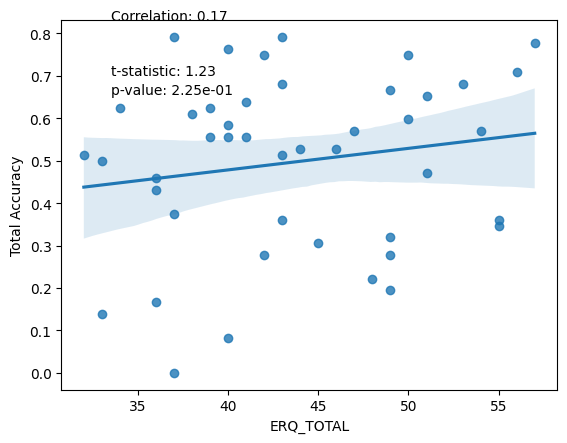

In [ ]:
# prompt: generate a scatterplot with df that compares ERQ_TOTAL to total accuracy and calculates the correlation coefficient and the line of best fit

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot with regression line
sns.regplot(x="ERQ_TOTAL", y="Total Accuracy", data=df)

# Calculate the correlation coefficient
correlation = df['ERQ_TOTAL'].corr(df['Total Accuracy'])

#pvalue calculation
t= correlation/np.sqrt((1-(correlation**2))/(len(df)-2))
p_value = stats.t.sf(np.abs(t), len(df)-2) * 2
# Add the correlation coefficient to the plot
plt.text(0.1, 1, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f"t-statistic: {t:.2f}", transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f"p-value: {p_value:.2e}", transform=plt.gca().transAxes)
# Show the plot

plt.show()


Correlation coefficient: 0.1711452068809755


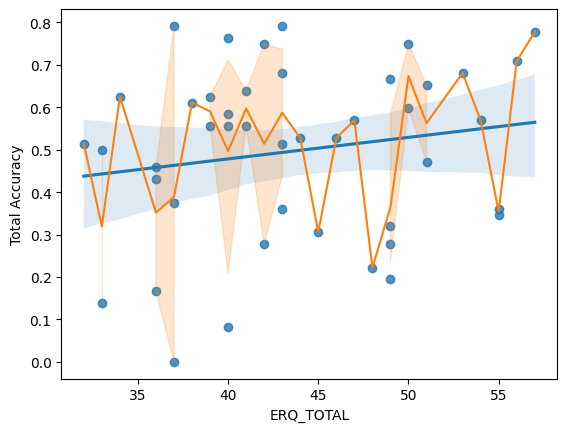

In [ ]:
# prompt: generate a scatterplot with df that compares ERQ_TOTAL to total accuracy and calculates the corelation and make a line of best fit

import seaborn as sns
!pip install scipy
from scipy import stats

sns.regplot(x="ERQ_TOTAL", y="Total Accuracy", data=df)

# Calculate the correlation coefficient
correlation = df["ERQ_TOTAL"].corr(df["Total Accuracy"])

# Print the correlation coefficient
print(f"Correlation coefficient: {correlation}")

# Add the line of best fit
sns.lineplot(x="ERQ_TOTAL", y="Total Accuracy", data=df)

# Show the plot
plt.show()


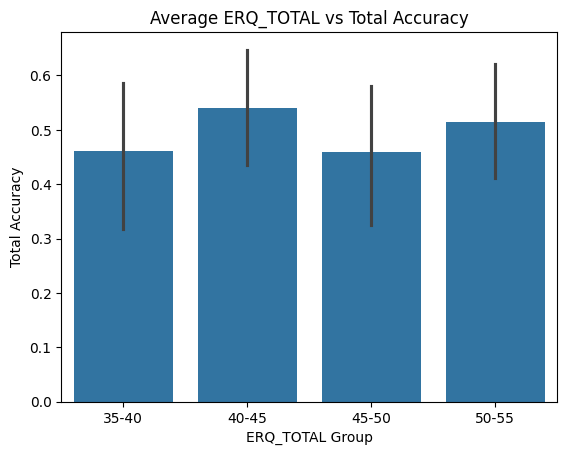

In [ ]:
# prompt: generate a bar graph for average ERQ_TOTAL vs Total Accuracy with grouping ERQ_TOTAL scores from 35-40. 40-45, 45-50, 50-55

import pandas as pd
import seaborn as sns

# Create some example data


# Group ERQ_TOTAL scores
df['ERQ_TOTAL_Group'] = pd.cut(df['ERQ_TOTAL'], bins=[35, 40, 45, 50, 55], labels=['35-40', '40-45', '45-50', '50-55'])

# Create a bar graph
sns.barplot(x="ERQ_TOTAL_Group", y="Total Accuracy", data=df)

# Add title and labels
plt.title("Average ERQ_TOTAL vs Total Accuracy")
plt.xlabel("ERQ_TOTAL Group")
plt.ylabel("Total Accuracy")

# Show the plot
plt.show()


In [ ]:
df.to_excel('working_mem_stats.xlsx', index=False)
files.download('working_mem_stats.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>